# Lab 4 SVM

# Task-1.1
Fetch the Data and Prepare the DataFrames

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.metrics import roc_curve,auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

In [2]:
iris=datasets.load_iris()
feature_names=iris['feature_names']
feature_names.append('class_label')
column_labels=np.array(feature_names)


In [3]:
target=np.array(iris['target'])
data=np.array(iris['data'])
iris_data=np.concatenate((data,target.reshape(-1,1)),axis=1)
df= pd.DataFrame(iris_data,columns=column_labels)

## Task-1.2
EDA of the data to see the different relations between the variables

<Axes: xlabel='petal width (cm)', ylabel='class_label'>

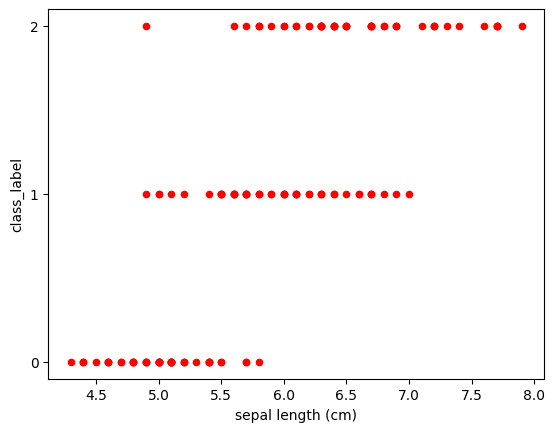

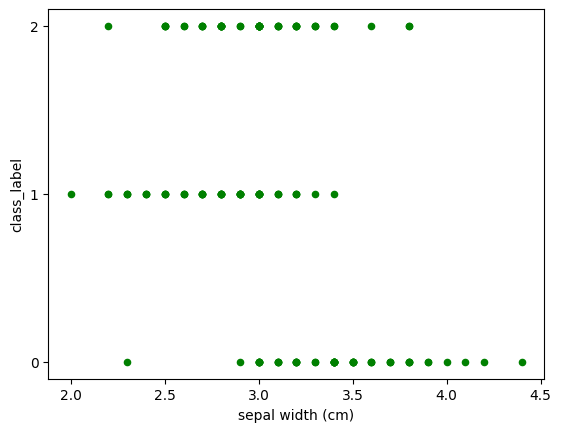

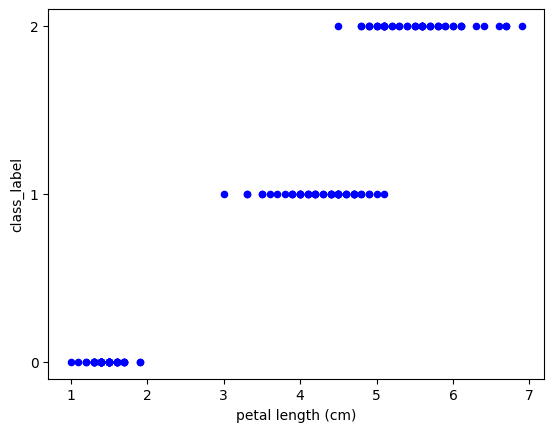

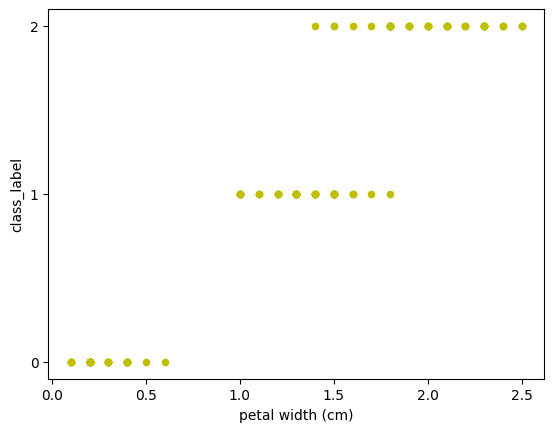

In [4]:
df.plot.scatter(x='sepal length (cm)',y='class_label',yticks=[0,1,2],color='r',legend=True)
df.plot.scatter(x='sepal width (cm)',y='class_label',yticks=[0,1,2],color='g',legend=True)
df.plot.scatter(x='petal length (cm)',y='class_label',yticks=[0,1,2],color='b',legend=True)
df.plot.scatter(x='petal width (cm)',y='class_label',yticks=[0,1,2],color='y',legend=True)

<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>

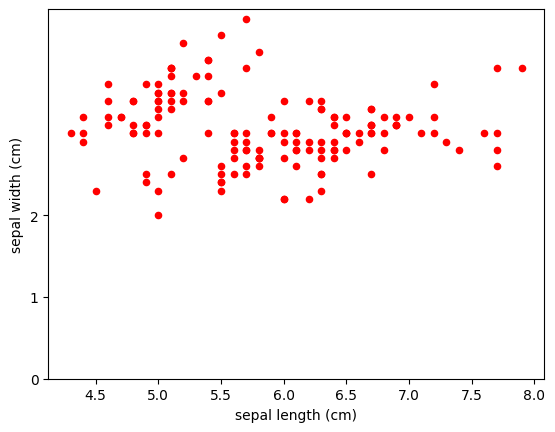

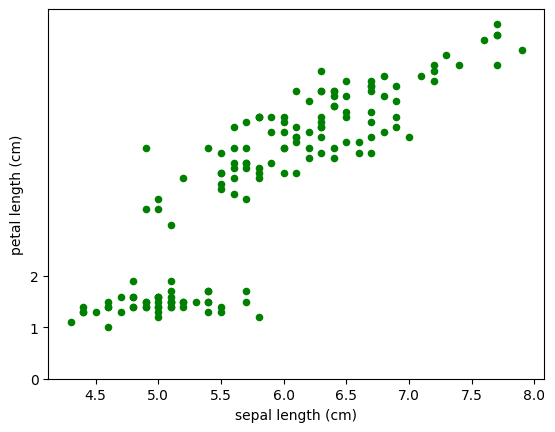

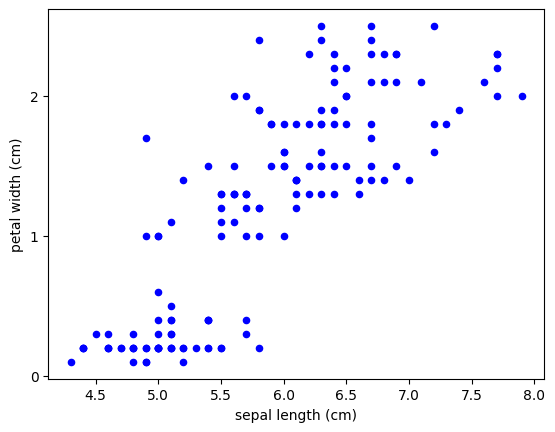

In [5]:
df.plot.scatter(x='sepal length (cm)',y='sepal width (cm)',yticks=[0,1,2],color='r',legend=True)
df.plot.scatter(x='sepal length (cm)',y='petal length (cm)',yticks=[0,1,2],color='g',legend=True)
df.plot.scatter(x='sepal length (cm)',y='petal width (cm)',yticks=[0,1,2],color='b',legend=True)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

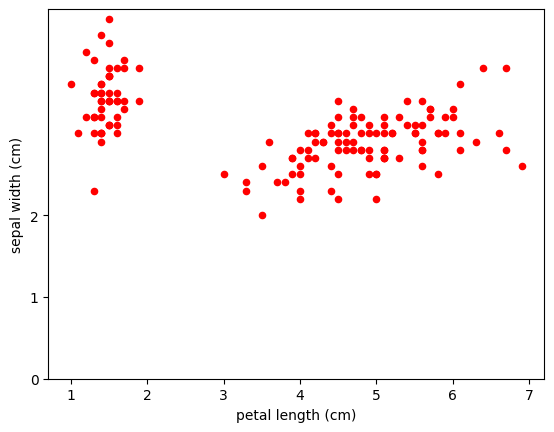

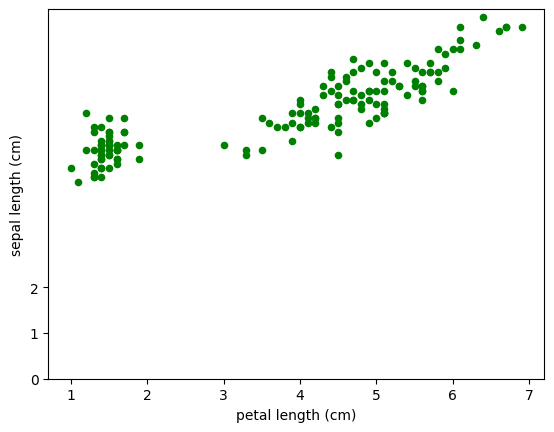

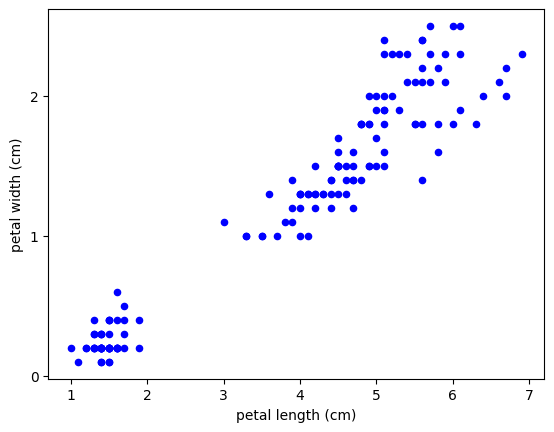

In [6]:
df.plot.scatter(x='petal length (cm)',y='sepal width (cm)',yticks=[0,1,2],color='r',legend=True)
df.plot.scatter(x='petal length (cm)',y='sepal length (cm)',yticks=[0,1,2],color='g',legend=True)
df.plot.scatter(x='petal length (cm)',y='petal width (cm)',yticks=[0,1,2],color='b',legend=True)

<Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>

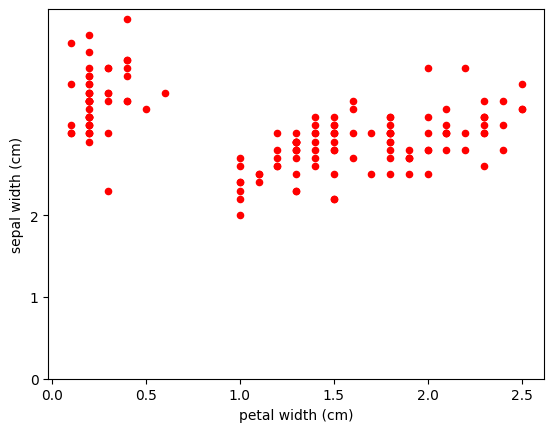

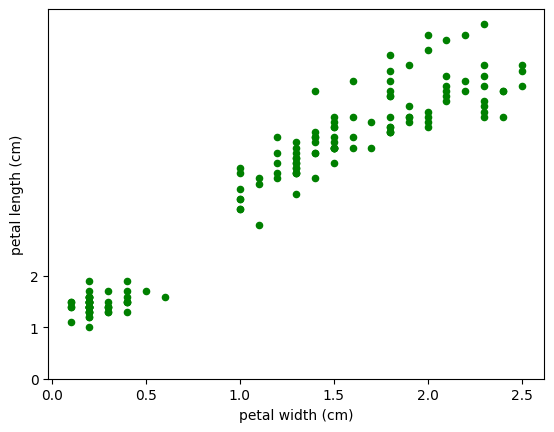

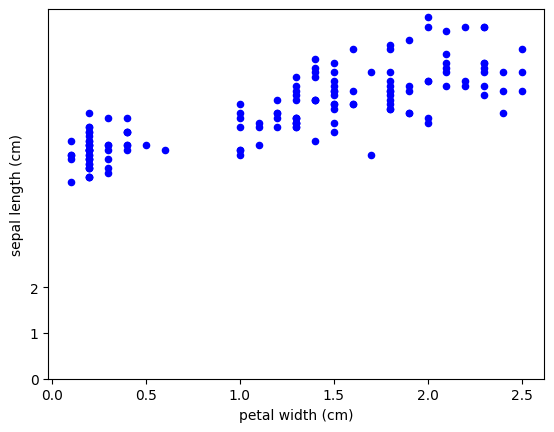

In [7]:
df.plot.scatter(x='petal width (cm)',y='sepal width (cm)',yticks=[0,1,2],color='r',legend=True)
df.plot.scatter(x='petal width (cm)',y='petal length (cm)',yticks=[0,1,2],color='g',legend=True)
df.plot.scatter(x='petal width (cm)',y='sepal length (cm)',yticks=[0,1,2],color='b',legend=True)

<Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

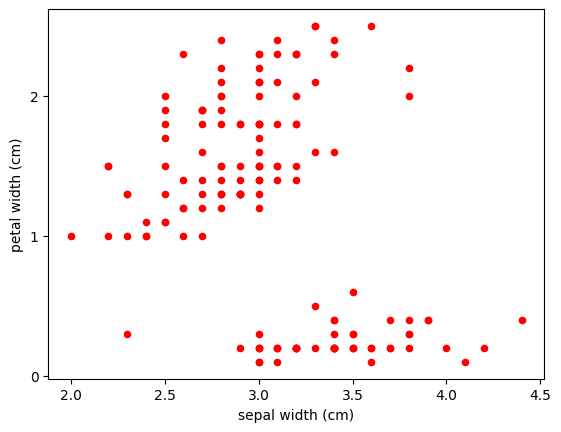

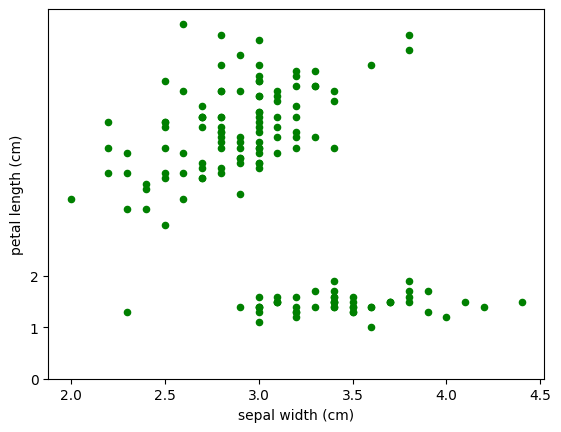

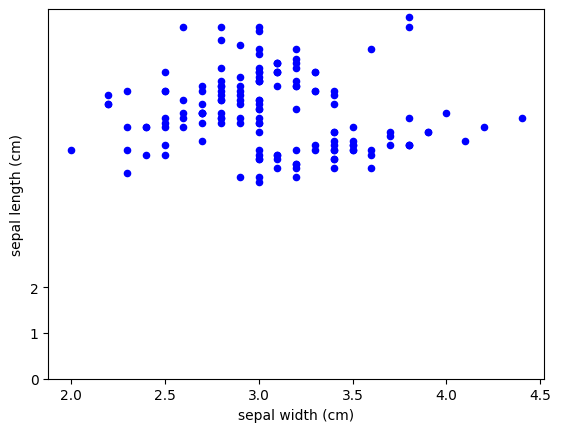

In [8]:
df.plot.scatter(x='sepal width (cm)',y='petal width (cm)',yticks=[0,1,2],color='r',legend=True)
df.plot.scatter(x='sepal width (cm)',y='petal length (cm)',yticks=[0,1,2],color='g',legend=True)
df.plot.scatter(x='sepal width (cm)',y='sepal length (cm)',yticks=[0,1,2],color='b',legend=True)

In [9]:
cols = set(df.columns) - {'class_label'}
df1 = df[list(cols)]
df1.describe()

,sepal width (cm),petal length (cm),sepal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,3.057333,3.758000,5.843333,1.199333
std,0.435866,1.765298,0.828066,0.762238
min,2.000000,1.000000,4.300000,0.100000
25%,2.800000,1.600000,5.100000,0.300000
50%,3.000000,4.350000,5.800000,1.300000
75%,3.300000,5.100000,6.400000,1.800000
max,4.400000,6.900000,7.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class_label        150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


## Task 2
### Data Preprocessing
From the dataset, define your training set, target variable, test set, and splitting.

In [11]:
X=df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
Y=df['class_label']
X_train,X_test,y_train, y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)

#Task 3
The SVC() function can be used to fit a support vector classifier when the argument kernel="linear" is used.  We will use SVC() function from sklearn.svm.SVC library to create our classifier model using fit() method on the training data set.
## Support vector classifier
cls = SVC().fit(X_train, y_train)


In [12]:
from sklearn.svm import SVC
model=SVC(kernel='linear').fit(X_train,y_train)

# Task 4
Report the classification accuracy

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
model.predict(X_test)

array([1., 2., 1., 0., 0., 2., 0., 1., 0., 2., 0., 1., 0., 1., 2., 1., 1.,
       2., 2., 1., 0., 2., 1., 0., 0., 2., 0., 1., 2., 2.])

In [15]:
print("Accuracy(%): ",accuracy_score(model.predict(X_test),y_test)*100,"%")

Accuracy(%):  96.66666666666667 %


# Task 5
## Experiments:

 (i) Report the performance of the SVC comparing linear kernel, polynomial kernel, Radial basis function kernel, and sigmoid function

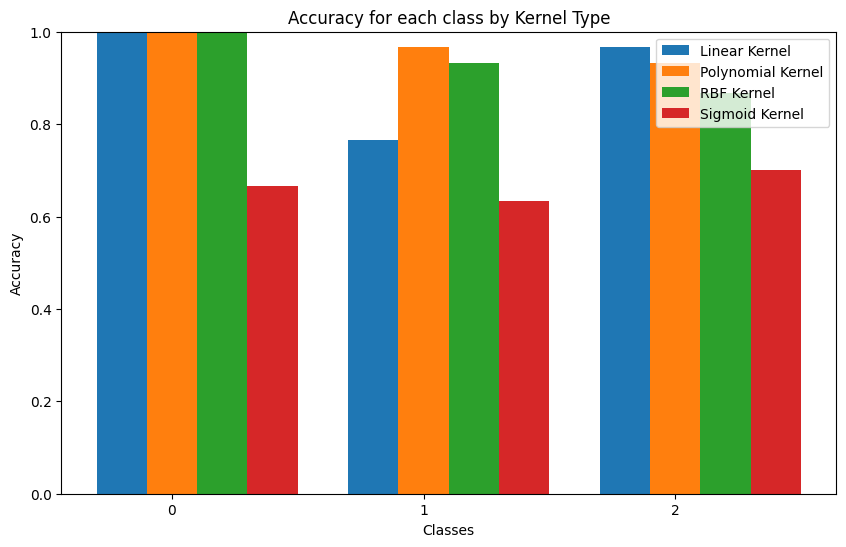

In [16]:
linear_kernel = SVC(kernel='linear')
polynomial_kernel = SVC(kernel='poly')
radial_basis_function_kernel = SVC(kernel='rbf')
sigmoid_function = SVC(kernel='sigmoid')
y_train_bin = label_binarize(y_train, classes=[0,1,2])
y_test_bin = label_binarize(y_test, classes=[0,1,2])
classifiers = [linear_kernel, polynomial_kernel, radial_basis_function_kernel, sigmoid_function]
kernel_labels = ['Linear Kernel', 'Polynomial Kernel', 'RBF Kernel', 'Sigmoid Kernel']


class_accuracy = []

for i, classifier in enumerate(classifiers):
    ovr_classifier = OneVsRestClassifier(classifier)
    ovr_classifier.fit(X_train, y_train_bin)
    y_pred = ovr_classifier.predict(X_test)
    y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

    class_accuracy.append([accuracy_score(y_test_bin[:, c], y_pred_bin[:, c]) for c in range(y_test_bin.shape[1])])

plt.figure(figsize=(10, 6))
x = range(3)
width = 0.2

for i, kernel_label in enumerate(kernel_labels):
    plt.bar(
        [pos + width * i for pos in x],
        class_accuracy[i],
        width=width,
        label=kernel_label
    )

plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy for each class by Kernel Type')
plt.xticks([pos + width for pos in x], range(3))
plt.legend(kernel_labels)
plt.ylim(0, 1)
plt.show()


(ii) Draw the ROC for only linear and polynomial kernel

Linear

In [17]:
linear_model = OneVsRestClassifier(SVC(kernel='linear'))
y_train_bin = label_binarize(y_train, classes=[0,1,2])
y_test_bin = label_binarize(y_test, classes=[0,1,2])
linear_model.fit(X_train,y_train_bin)
n_classes=linear_model.classes_.shape[0]

In [18]:
y_pred = linear_model.predict(X_test)
y_pred_bin=label_binarize(y_pred,classes=[0,1,2])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

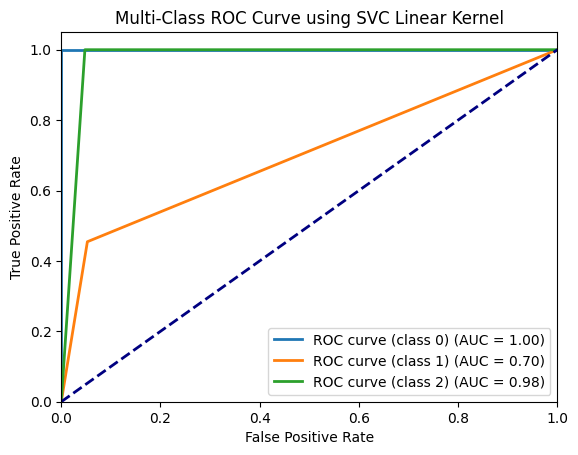

In [19]:
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve using SVC Linear Kernel')
plt.legend(loc="lower right")
plt.show()

Polynomial

In [20]:
poly_model = OneVsRestClassifier(SVC(kernel='poly'))
y_train_bin = label_binarize(y_train, classes=[0,1,2])
y_test_bin = label_binarize(y_test, classes=[0,1,2])
poly_model.fit(X_train,y_train_bin)
n_classes=poly_model.classes_.shape[0]

In [21]:
y_pred = poly_model.predict(X_test)
y_pred_bin=label_binarize(y_pred,classes=[0,1,2])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

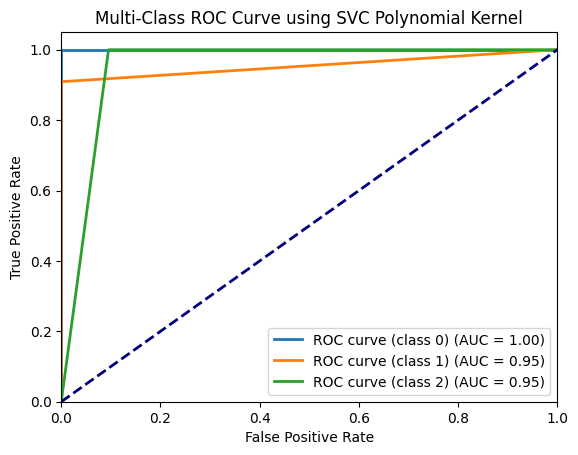

In [22]:
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve using SVC Polynomial Kernel')
plt.legend(loc="lower right")
plt.show()

(iii) Plot the confusion matrix for which you got the highest accuracy

Since Polynomial with degree 3 appears to give the highest accuracy as highlighted by the roc curve and the auc values along with the accuracy score from earlier

In [23]:
poly_model = OneVsRestClassifier(SVC(kernel='poly'))
y_train_bin = label_binarize(y_train, classes=[0,1,2])
y_test_bin = label_binarize(y_test, classes=[0,1,2])
poly_model.fit(X_train,y_train_bin)
y_pred = poly_model.predict(X_test)
y_pred_bin=label_binarize(y_pred,classes=[0,1,2])

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

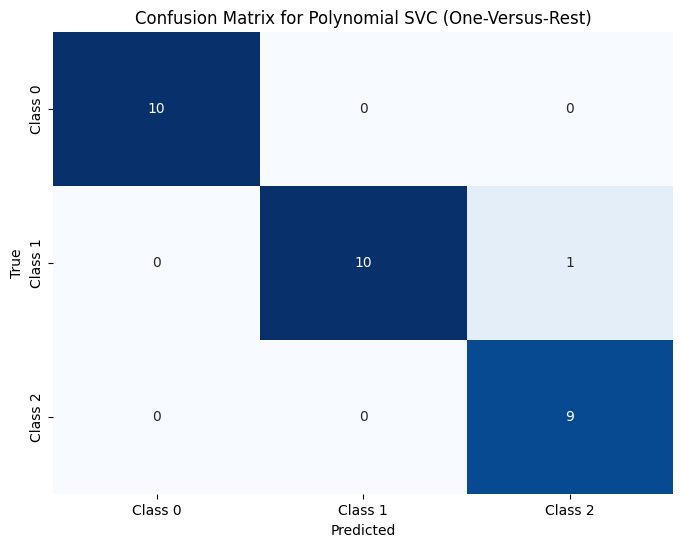

In [25]:
confusion = confusion_matrix(y_test_bin.argmax(axis=1), y_pred_bin.argmax(axis=1))

# Create a figure and axis
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Polynomial SVC (One-Versus-Rest)')

plt.show()

(iv) Identify hyper parameter of SVC and show the effect of hyper parameter on your dataset.
Using polynomial kernel function and OVR we see that the hyperparameters are
- degree
- regularization
- gamma
- class weight to handle class imbalance

Performing grid search with 10 fold cross validation

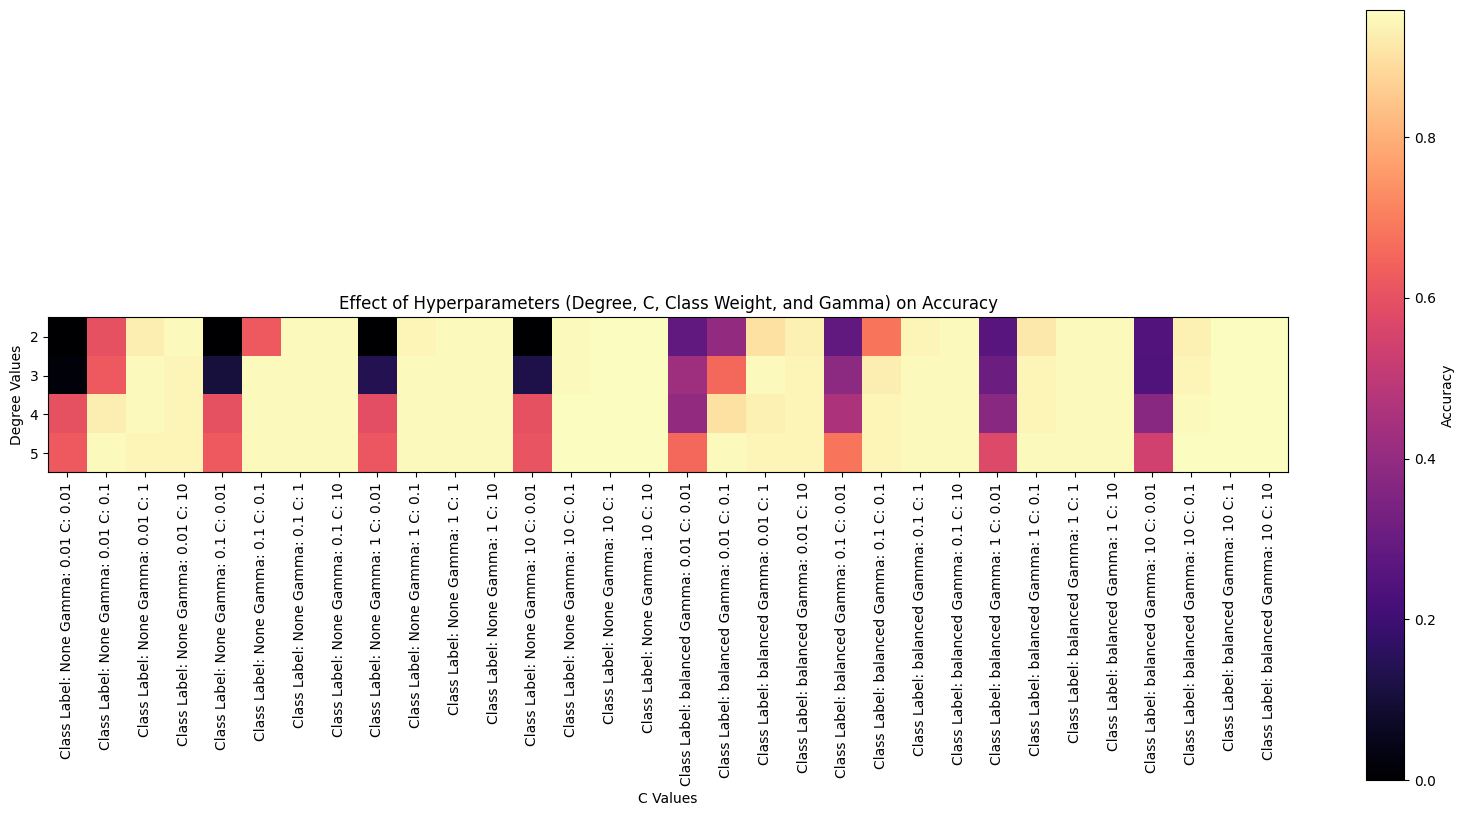

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'estimator__degree': [2,3,4,5],
    'estimator__C': [0.01,0.1,1,10],
    'estimator__gamma': [0.01,0.1,1,10],
    'estimator__class_weight': [None, 'balanced']
}

poly_model = OneVsRestClassifier(SVC(kernel='poly'))


grid_search = GridSearchCV(poly_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train_bin)
results = grid_search.cv_results_
mean_test_scores = np.array(results['mean_test_score']).reshape(len(param_grid['estimator__degree']), -1)

plt.figure(figsize=(20, 10))
plt.imshow(mean_test_scores, interpolation='nearest', cmap='magma')
plt.xlabel('C Values')
plt.ylabel('Degree Values')
cbar = plt.colorbar()
cbar.set_label('Accuracy')
x_labels=[]
for i in param_grid['estimator__class_weight']:
  for j in param_grid['estimator__gamma']:
    for k in param_grid['estimator__C']:
      x_labels.append("Class Label: "+str(i)+" Gamma: "+str(j)+" C: "+str(k))
plt.xticks(np.arange(len(param_grid['estimator__C'])*8),x_labels, rotation=90)
plt.yticks(np.arange(len(param_grid['estimator__degree'])),param_grid['estimator__degree'])
plt.title('Effect of Hyperparameters (Degree, C, Class Weight, and Gamma) on Accuracy')
plt.show()

In [27]:
estimator_df=pd.DataFrame([[grid_search.best_params_['estimator__C'],grid_search.best_params_['estimator__class_weight'],grid_search.best_params_['estimator__degree'],grid_search.best_params_['estimator__gamma'],grid_search.best_score_]],columns=['C','Class Weight','Degree','Gamma','Accuracy'])
estimator_df.style.set_caption("Best HyperParameters and Accuracy")

,C,Class Weight,Degree,Gamma,Accuracy
0,0.010000,None,5,1,0.958333
